In [1]:
#import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
from bokeh.plotting import figure, output_notebook, show, ColumnDataSource
from bokeh.models import DatetimeTickFormatter,PrintfTickFormatter,HoverTool
output_notebook()

Loading BokehJS ...

In [2]:
#load the data

In [3]:
data = pd.read_csv('seattleWeather_1948-2017.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 5 columns):
DATE    25551 non-null object
PRCP    25548 non-null float64
TMAX    25551 non-null int64
TMIN    25551 non-null int64
RAIN    25548 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 998.2+ KB


In [6]:
#describe the data
data.describe()

,PRCP,TMAX,TMIN
count,25548.000000,25551.000000,25551.000000
mean,0.106222,59.544206,44.514226
std,0.239031,12.772984,8.892836
min,0.000000,4.000000,0.000000
25%,0.000000,50.000000,38.000000
50%,0.000000,58.000000,45.000000
75%,0.100000,69.000000,52.000000
max,5.020000,103.000000,71.000000


In [7]:
#convert the 'DATE' column to datetime
data.DATE = pd.to_datetime(data.DATE)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 5 columns):
DATE    25551 non-null datetime64[ns]
PRCP    25548 non-null float64
TMAX    25551 non-null int64
TMIN    25551 non-null int64
RAIN    25548 non-null object
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 998.2+ KB


In [9]:
data[:4]

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True


In [10]:
#make a copy of the data to play with

In [11]:
df = data.copy()

In [12]:
#set the DATE column as the index

In [13]:
df.set_index('DATE', inplace=True)

In [14]:
df[:3]

,PRCP,TMAX,TMIN,RAIN
DATE,,,,
1948-01-01,0.47,51,42,True
1948-01-02,0.59,45,36,True
1948-01-03,0.42,45,35,True


In [14]:
#get the hottest day

In [15]:
#method 1
data.loc[data.TMAX.idxmax()]

DATE    2009-07-29 00:00:00
PRCP                      0
TMAX                    103
TMIN                     71
RAIN                  False
Name: 22490, dtype: object

In [16]:
#method 2
data.sort_values(by='TMAX', ascending=False)[:1]

,DATE,PRCP,TMAX,TMIN,RAIN
22490,2009-07-29,0.0,103,71,False


In [17]:
#get the coolest day

In [17]:
data.loc[data.TMAX.idxmin()]

DATE    1951-11-20 00:00:00
PRCP                   0.08
TMAX                      4
TMIN                     39
RAIN                   True
Name: 1419, dtype: object

In [19]:
#method 2
data.sort_values(by='TMAX', ascending=False)[-1:]

,DATE,PRCP,TMAX,TMIN,RAIN
1419,1951-11-20,0.08,4,39,True


In [19]:
#get the year with most rain
#method 1

In [20]:
df['year'] = df.index.year

In [21]:
def rain_by_year(group):
   return group.PRCP.sum()

In [22]:
rain_grouped_by_year = df.groupby('year').apply(rain_by_year)
rain_grouped_by_year.sort_values(ascending=False)[:10]

year
1950    55.14
1996    50.67
1968    50.15
1953    49.42
2014    48.50
2006    48.42
1972    48.36
2012    48.26
2010    46.99
1955    46.61
dtype: float64

In [23]:
rain_over_years = df.groupby('year').PRCP.sum()
rain_over_years = rain_over_years.reset_index()

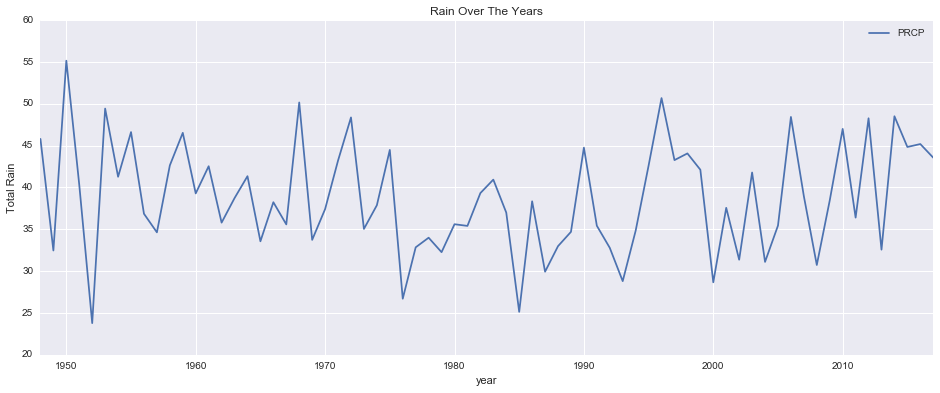

In [24]:
source = ColumnDataSource(data=rain_over_years)
hover = HoverTool(tooltips=[
    ("Year", "@year"),
    ("PRCP", "@PRCP")
])
p = figure(plot_width=900, plot_height=400, tools=[hover], title='Total Rain Over The Years')
p.xaxis.axis_label = 'Years'
p.yaxis.axis_label = 'PRCP'
p.title_location ='above'
p.line(x='year', y='PRCP',source=source)
show(p)
fig, ax = plt.subplots(figsize=(16, 6))
ax.set(ylabel='Total Rain')
rain_over_years.set_index('year').plot(ax=ax, title='Rain Over The Years')


In [26]:
#method 2
#more easy than method 1
df.resample('A-DEC',kind='period')['PRCP'].sum().reset_index().sort_values(by='PRCP', ascending=False)[:10]

,DATE,PRCP
2,1950,55.14
48,1996,50.67
20,1968,50.15
5,1953,49.42
66,2014,48.50
58,2006,48.42
24,1972,48.36
64,2012,48.26
62,2010,46.99
7,1955,46.61


In [27]:
#From our figure 1950 is the year with the most rain
#Lets check that
#1950 is the year with the most rain
df[df.year == 1950].PRCP.sum()

55.140000000000001

In [28]:
#1952 is the year with the least rain
df[df.year == 1952].PRCP.sum()

23.780000000000001

In [26]:
#create a month column
df['month'] = df.index.month

In [27]:
#get the month of every year with the most rain
all_years = []

In [28]:
for yr in range(1948,2017):
    wanted = df[df.index.year == yr]
    all_years.append(wanted.groupby(['year','month']).PRCP.sum().reset_index().sort_values(by='PRCP', ascending=False)[:1])

In [29]:
rain_by_year_and_month = pd.concat([x for x in all_years])

In [30]:
rain_by_year_and_month.sort_values(by='PRCP', ascending=False)[:10]

,year,month,PRCP
10,2006,11,15.63
0,1953,1,12.92
11,1979,12,11.85
10,1998,11,11.62
11,2015,12,11.21
10,1990,11,10.71
10,1995,11,10.40
11,1996,12,10.18
9,2016,10,10.05
0,1964,1,9.76


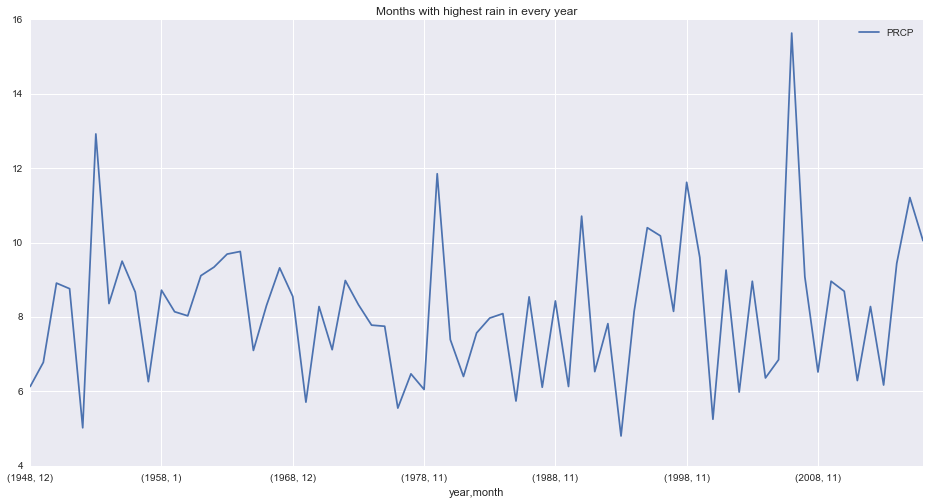

In [31]:
source = ColumnDataSource(data=rain_by_year_and_month)
hover = HoverTool(tooltips=[
    ("Year", "@year"),
    ("Month","@month"),
    ("PRCP", "@PRCP")
])
p = figure(plot_width=900, plot_height=400, tools=[hover], title='Months with the most rain')
p.xaxis.axis_label = 'Years'
p.yaxis.axis_label = 'PRCP'
p.title_location ='above'
p.line(x='year', y='PRCP',source=source)
show(p)

rain_by_year_and_month.set_index(['year','month']).plot(figsize=(16,8), title='Months with highest rain in every year')

In [34]:
#December,November and January are the three months with the most rain
rain_by_year_and_month.month.value_counts()

12    19
11    19
1     14
3      6
10     5
2      4
9      1
4      1
Name: month, dtype: int64

In [35]:
#hottest months

In [36]:
hottest_month = []

In [37]:
for yr in range(1948,2017):
    wanted = df[df.index.year == yr]
    hottest_month.append(wanted.groupby(['year','month']).TMAX.sum().reset_index().sort_values(by='TMAX', ascending=False)[:1])

In [38]:
hottest_by_month_and_year = pd.concat([x for x in hottest_month])

In [39]:
hottest_by_month_and_year.sort_values(by='TMAX')[:10]

,year,month,TMAX
6,1954,7,2154
8,1957,9,2205
7,1955,8,2211
6,1964,7,2241
7,1953,8,2257
6,1948,7,2267
6,1980,7,2271
7,1999,8,2276
6,2000,7,2280
7,2001,8,2287


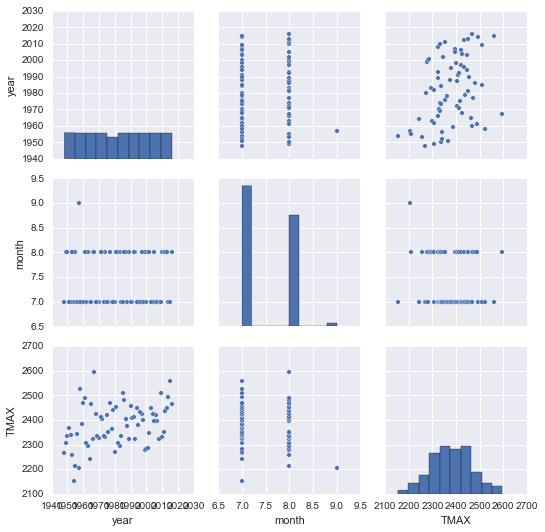

In [40]:
sns.pairplot(hottest_by_month_and_year.sort_values(by='TMAX'))

In [42]:
month_mappings ={1:'Jan', 2:'Feb',3:'Mar', 4:'Apr',5:'May', 6:'Jun',7:'Jul',8:'Aug',9:'Sep', 10:'Oct',11:'Nov',
    12:'Dec'}
f = lambda x: month_mappings.get(x,x)
hottest_by_month_and_year.month = hottest_by_month_and_year.month.apply(f)#July and August are the hottest month

In [43]:
#which months were the hottest over the years

In [44]:
hottest_by_month_and_year.month.value_counts()

Jul    38
Aug    30
Sep     1
Name: month, dtype: int64

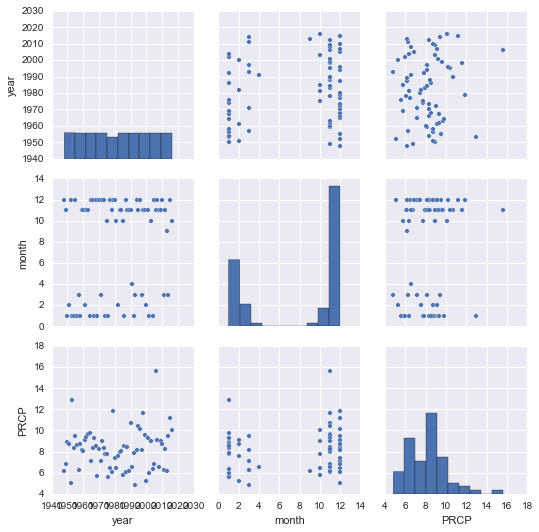

In [87]:
sns.pairplot(rain_by_year_and_month)